In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tqdm as tqdm
from transformers import BertTokenizer

### Read Data

In [40]:
file_path = r'../public_data/train/track_a/eng.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!")
except FileNotFoundError:
    print("The specified file path is not found. Please check the path and try again.")

Dataset Loaded Successfully!


In [41]:
df.isnull().sum()

id          0
text        0
Anger       0
Fear        0
Joy         0
Sadness     0
Surprise    0
dtype: int64

### Label Distribution

In [42]:
labels = ['Joy', 'Sadness', 'Fear', 'Anger', 'Surprise']
label_counts = df[labels].sum()
print(label_counts)

# Count how many labels each text has
label_combinations = df[labels].sum(axis=1)
print(label_combinations.value_counts())

Joy          674
Sadness      878
Fear        1611
Anger        333
Surprise     839
dtype: int64
1    1141
2    1031
3     298
0     239
4      57
5       2
Name: count, dtype: int64


The dataset shows imbalanced classes, which will need to be addressed during model training (e.g., using class weights or oversampling)

Add a 'neutral' column

In [43]:
df['neutral'] = (df[labels].sum(axis=1) == 0).astype(int)


In [44]:
df.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise,neutral
0,eng_train_track_a_00001,But not very happy.,0,0,1,1,0,0
1,eng_train_track_a_00002,Well she's not gon na last the whole song like...,0,0,1,0,0,0
2,eng_train_track_a_00003,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0,1
3,eng_train_track_a_00004,"Yes, the Oklahoma city bombing.",1,1,0,1,1,0
4,eng_train_track_a_00005,They were dancing to Bolero.,0,0,1,0,0,0


### Text Analysis

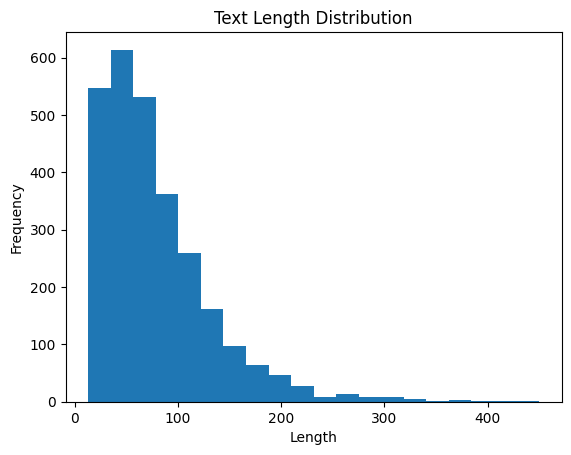

In [45]:
df['text_length'] = df['text'].apply(len)
df['text_length'].describe()

plt.hist(df['text_length'], bins=20)
plt.title('Text Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [46]:
df.head()

,id,text,Anger,Fear,Joy,Sadness,Surprise,neutral,text_length
0,eng_train_track_a_00001,But not very happy.,0,0,1,1,0,0,19
1,eng_train_track_a_00002,Well she's not gon na last the whole song like...,0,0,1,0,0,0,193
2,eng_train_track_a_00003,She sat at her Papa's recliner sofa only to mo...,0,0,0,0,0,1,90
3,eng_train_track_a_00004,"Yes, the Oklahoma city bombing.",1,1,0,1,1,0,31
4,eng_train_track_a_00005,They were dancing to Bolero.,0,0,1,0,0,0,28


                                                   text  \
0                                   But not very happy.   
1     Well she's not gon na last the whole song like...   
2     She sat at her Papa's recliner sofa only to mo...   
3                       Yes, the Oklahoma city bombing.   
4                          They were dancing to Bolero.   
...                                                 ...   
2763                 "Yeah, but did you just find that?   
2764  I did as little as possible with my right hand...   
2765                            Okay that sucks, right?   
2766  The spark leaped through his body into mine, a...   
2767  He had 4 inches and 40 pounds on me and I stil...   

                                                 tokens  token_count  
0                            [but, not, very, happy, .]            5  
1     [well, she, ', s, not, go, ##n, na, last, the,...           50  
2     [she, sat, at, her, papa, ', s, rec, ##liner, ...           23  
3      

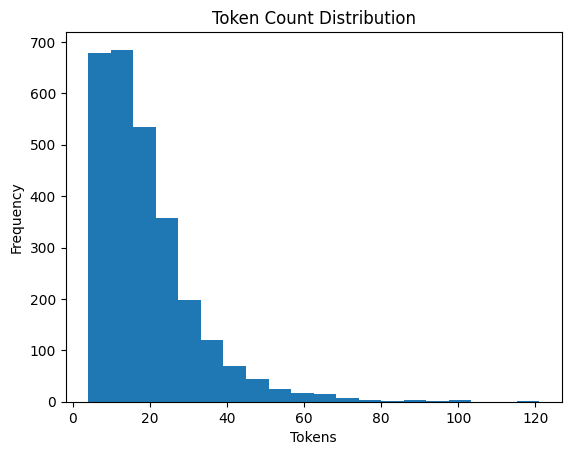

In [47]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

df['tokens'] = df['text'].apply(lambda x: tokenizer.tokenize(x))  # Store the actual tokens
df['token_count'] = df['tokens'].apply(len)  # Count the tokens

print(df[['text', 'tokens', 'token_count']])

plt.hist(df['token_count'], bins=20)
plt.title('Token Count Distribution')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

### Multi-Label Analysis


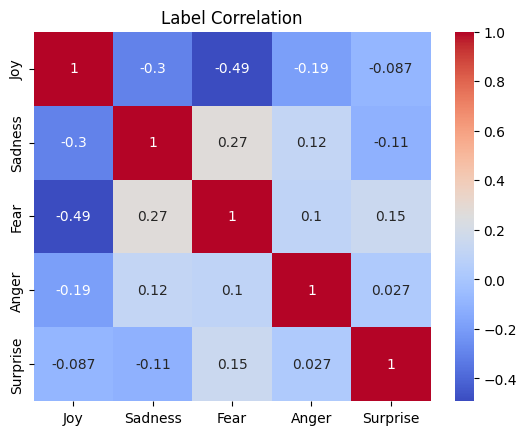

In [51]:
correlation = df[labels].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Label Correlation')
plt.show()

#### Key Observations:

1. **Negative Correlations:**
   - **Joy vs. Fear (-0.49):** Strong negative correlation; these emotions rarely co-occur.

2. **Positive Correlations:**
   - **Sadness vs. Fear (0.27):** Moderate positive correlation; these emotions often co-occur.

